# Interact with a WMS¶

OGC Web Map Service (WMS) can be used to download map images rendered by the remote server.

Example from [GeoPython Workshop](https://github.com/geopython/geopython-workshop/blob/master/workshop/jupyter/content/notebooks/10-remote-data.ipynb)

**This is the metadata of the service endpoint:**

In [1]:
from owslib.wms import WebMapService

wms_url = "https://ows.terrestris.de/osm/service"

wms = WebMapService(wms_url, version="1.3.0")

print(f"WMS version: {wms.identification.version}")
print(f"WMS title: {wms.identification.title}")
print(f"WMS abstract: {wms.identification.abstract}")
print(f"Provider name: {wms.provider.name}")
print(f"Provider address: {wms.provider.contact.address}")

WMS version: 1.3.0
WMS title: OpenStreetMap WMS
WMS abstract: OpenStreetMap WMS, bereitgestellt durch terrestris GmbH und Co. KG. Beschleunigt mit MapProxy (http://mapproxy.org/)
Provider name: terrestris GmbH und Co. KG
Provider address: Kölnstr. 99


Check the [Capabilities](https://ows.terrestris.de/osm/service?service=WMS&request=GetCapabilities&version=1.3.0) response directly from the server

**Available WMS layers:**

In [2]:
list(wms.contents)

['OSM-WMS',
 'OSM-Overlay-WMS',
 'TOPO-WMS',
 'TOPO-OSM-WMS',
 'SRTM30-Hillshade',
 'SRTM30-Colored',
 'SRTM30-Colored-Hillshade',
 'SRTM30-Contour']

In [3]:
wms.contents['SRTM30-Colored'].boundingBox

(-180.0, -56.0, 180.0, 60.0, 'CRS:84')

In [4]:
wms.contents['SRTM30-Colored'].boundingBoxWGS84

(-180.0, -56.0, 180.0, 60.0)

In [5]:
print(wms['SRTM30-Colored'].crsOptions)

['EPSG:2180', 'EPSG:29192', 'EPSG:4839', 'EPSG:4674', 'EPSG:4647', 'EPSG:3035', 'EPSG:2100', 'EPSG:4326', 'EPSG:3034', 'EPSG:2056', 'EPSG:900913', 'EPSG:3857', 'EPSG:31467', 'EPSG:32648', 'EPSG:25833', 'EPSG:5243', 'EPSG:4258', 'EPSG:21781', 'EPSG:31463', 'EPSG:31466', 'EPSG:3068', 'EPSG:25832', 'EPSG:4686', 'EPSG:31468', 'EPSG:29193']


In [6]:
print(wms['SRTM30-Colored'].styles)

{'default': {'title': 'default', 'legend': 'https://ows.terrestris.de/osm/service?styles=&layer=SRTM30-Colored&service=WMS&format=image%2Fpng&sld_version=1.1.0&request=GetLegendGraphic&version=1.1.1', 'legend_width': '155', 'legend_height': '241', 'legend_format': 'image/png'}}


**Available methods, their URLs, and available formats:**

In [7]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'GetLegendGraphic']

In [8]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get', 'url': 'https://ows.terrestris.de/osm/service?'}]

In [9]:
wms.getOperationByName('GetMap').formatOptions

['image/jpeg', 'image/png']

**That's everything needed to make a request for imagery:**

In [10]:
img = wms.getmap(
    layers=['SRTM30-Colored'],
    size=[600, 400],
    srs="EPSG:4326",
    bbox=[1.0, 50.0, 10.0, 54.0],
    format="image/jpeg")

**Result:**

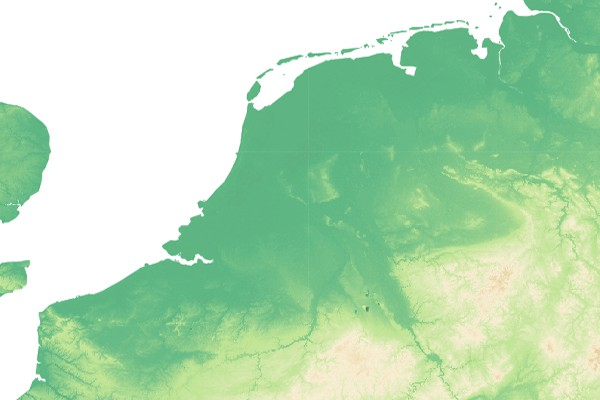

In [11]:
from IPython.display import Image
Image(img.read())